In [1]:
import numpy as np
import matplotlib.pyplot as plt

Bias function as described by Lennard: https://pubs.acs.org/doi/10.1021/acs.jctc.0c01112

In [2]:
def dfunct(r_ij, r_kl, r_0, d, k):
    return 0.5 * k * (r_ij + d * r_kl - r_0) ** 2

Evaluate `DFUNCT` at different `R_0`

In [3]:
def calculate_potential(d, k):
    r_0 = np.linspace(-2, 4, 4)
    r_ij_range = np.linspace(-5, 5, 101)
    r_kl_range = np.linspace(-5, 5, 101)
    r_ij, r_kl = np.meshgrid(r_ij_range, r_kl_range)
    V = np.zeros((4, 101, 101))
    V[0] = dfunct(r_ij, r_kl, r_0[0], d, k)
    V[1] = dfunct(r_ij, r_kl, r_0[1], d, k)
    V[2] = dfunct(r_ij, r_kl, r_0[2], d, k)
    V[3] = dfunct(r_ij, r_kl, r_0[3], d, k)
    return V, r_ij, r_kl

Plot surface maps at different bias distances `R_0`:

In [4]:
def plot_pes(V, r_ij, r_kl):
    cs = []
    fig, axs = plt.subplots(2, 2, figsize=(14, 14))
    cs.append(axs[0, 0].contour(r_ij, r_kl, V[0]))
    cs.append(axs[0, 1].contour(r_ij, r_kl, V[1]))
    cs.append(axs[1, 0].contour(r_ij, r_kl, V[2]))
    cs.append(axs[1, 1].contour(r_ij, r_kl, V[3]))
  
    for ax, cs_plot in zip(axs.flat, cs):
        ax.set(xlabel='r_ij', ylabel='r_kl')
        ax.clabel(cs_plot, inline=True, fontsize=10)

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    
    plt.show()

### Calculate PES for `d = -1` 

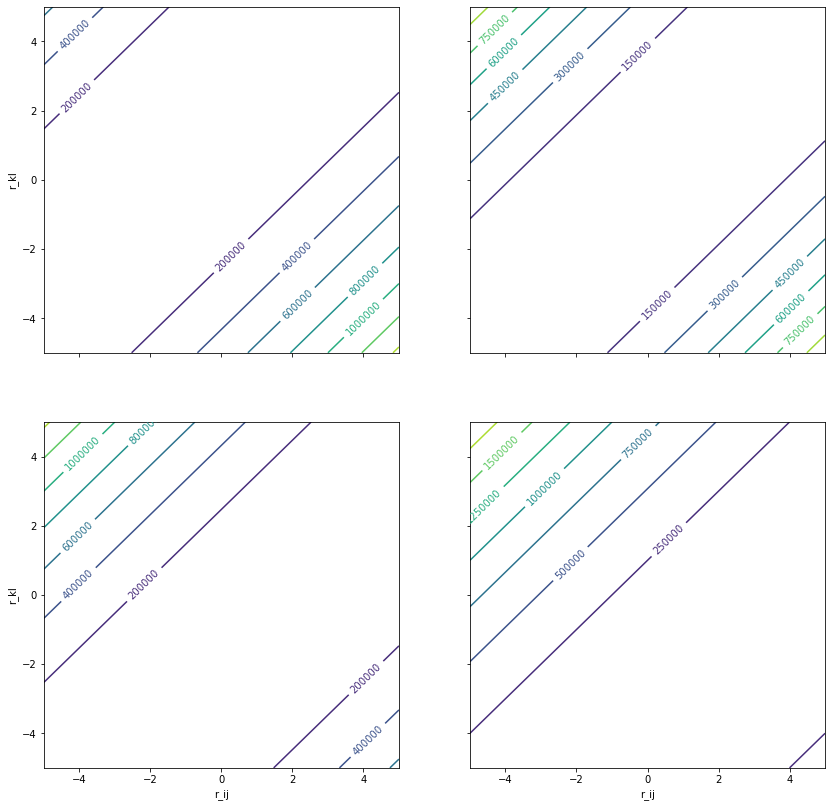

In [5]:
V, r_ij, r_kl = calculate_potential(-1, 20000)
plot_pes(V, r_ij, r_kl)

### Calculate PES for `d = +1` 

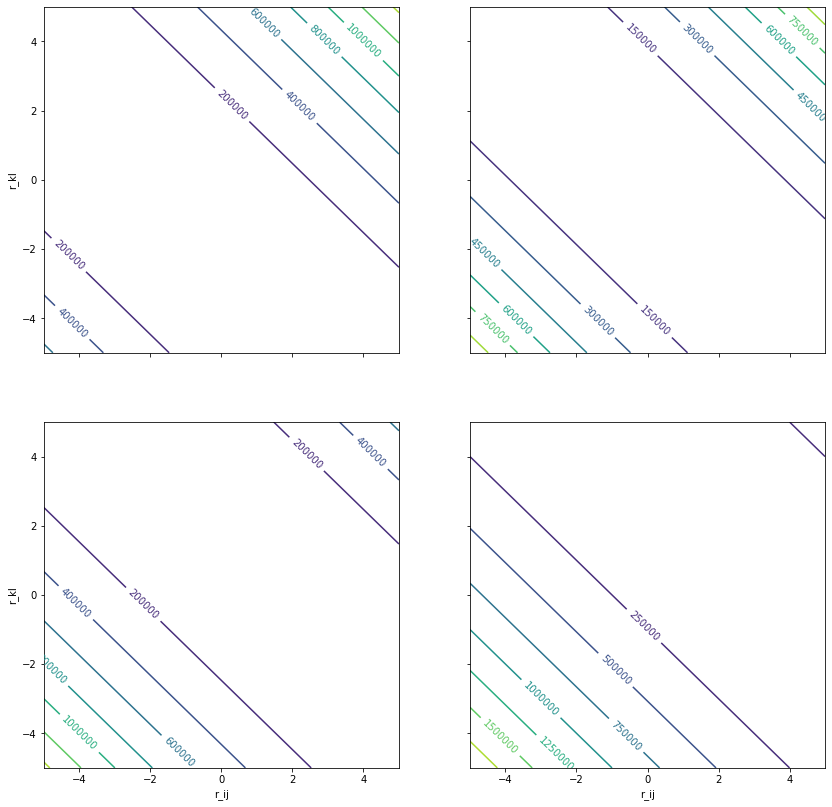

In [6]:
V, r_ij, r_kl = calculate_potential(1, 20000)
plot_pes(V, r_ij, r_kl)

Biasing potential

In [7]:
def V_bias(i, j, k, l, r_0=0.0, force=20000, d=-1):
    vec_ij, vec_kl, vec_ijkl, r_ij, r_kl, r_ijkl = calc_distances(i, j, k, l)
    return 0.5 * force * (r_ij + d * r_kl - r_0) ** 2

Force calculation like in my C++ code

In [8]:
def force_i(i, j, k, l, r_0=0.0, force=20000, d=-1):
    vec_ij, vec_kl, vec_ijkl, r_ij, r_kl, r_ijkl = calc_distances(i, j, k, l)
    return force * (vec_ijkl / r_ijkl) * (r_ij + d * r_kl - r_0)

def force_j(i, j, k, l, r_0=0.0, force=20000, d=-1):
    return force_i(i, j, k, l, r_0, force, d)

def force_k(i, j, k, l, r_0=0.0, force=20000, d=-1):
    vec_ij, vec_kl, vec_ijkl, r_ij, r_kl, r_ijkl = calc_distances(i, j, k, l)
    return d * force_i(i, j, k, l, r_0, force, d)

def force_l(i, j, k, l, r_0=0.0, force=20000, d=-1):
    return force_k(i, j, k, l, r_0, force, d)

Force calculation by atomic coordinates

In [9]:
def force_i_a(i, j, k, l, r_0=0.0, force=20000, d=-1):
    vec_ij, vec_kl, vec_ijkl, r_ij, r_kl, r_ijkl = calc_distances(i, j, k, l)
    return k * (vec_ijkl / r_ijkl) * ((i - j) + d * (k - l) - r_0)

def force_j_a(i, j, k, l, r_0=0.0, force=20000, d=-1):
    return -1.0 * force_i_a(i, j, k, l, r_0, force, d)

def force_k_a(i, j, k, l, r_0=0.0, force=20000, d=-1):
    vec_ij, vec_kl, vec_ijkl, r_ij, r_kl, r_ijkl = calc_distances(i, j, k, l)
    return force * k * (vec_ijkl / r_ijkl) * ((i - j) + d * (k - l) - r_0)

def force_l_a(i, j, k, l, r_0=0.0, force=20000, d=-1):
    return -1.0 * force * force_k_a(i, j, k, l, r_0, force, d)

Helper function

In [10]:
def calc_distances(i, j, k, l):
    vec_ij = i - j
    vec_kl = k - l
    r_ij = np.linalg.norm(vec_ij)
    r_kl = np.linalg.norm(vec_kl)
    vec_ij_halfs = vec_ij * 0.5
    vec_kl_halfs = vec_kl * 0.5
    vec_ijkl = vec_ij_halfs - vec_kl_halfs
    r_ijkl = np.linalg.norm(vec_ijkl)
    return vec_ij, vec_kl, vec_ijkl, r_ij, r_kl, r_ijkl

In [11]:
atom_i = np.array([1.0, 2.0])
atom_j = np.array([1.0, 4.0])
atom_k = np.array([3.0, 1.5])
atom_l = np.array([5.1, 1.5])

In [12]:
def plot_force_vectors(i, j, k, l):
    # calculate distances
    vec_ij, vec_kl, vec_ijkl, r_ij, r_kl, r_ijkl = calc_distances(i, j, k, l)
    
    # Vector origin location
    X = [0.0, i[0], j[0], k[0], l[0]]
    Y = [0.0, i[1], j[1], k[1], l[1]]
    
    # evaluate force
    f_i = force_i(i, j, k, l) / 300
    f_j = force_j(i, j, k, l) / 300
    f_k = force_k(i, j, k, l) / 300
    f_l = force_l(i, j, k, l) / 300
    
    # Vector direction
    U = [vec_ijkl[0], f_i[0], f_j[0], f_k[0], f_l[0]]  
    V = [vec_ijkl[1], f_i[1], f_j[1], f_k[1], f_l[1]]

    fig, axs = plt.subplots(figsize=(14, 14))

    # Creating plot
    plt.quiver(X, Y, U, V, color='b', units='xy', scale=1)
    plt.scatter(X, Y)
  
    # x-lim and y-lim
    plt.xlim(-5, 10)
    plt.ylim(-8, 12)
  
    # Show plot with grid
    plt.grid()
    plt.show()
    
def plot_force_vectors_a(i, j, k, l):
    # Vector origin location
    X = [i[0], j[0], k[0], l[0]]
    Y = [i[1], j[1], k[1], l[1]]
    
    # evaluate force
    f_i = force_i_a(i, j, k, l) / 300
    f_j = force_j_a(i, j, k, l) / 300
    f_k = force_k_a(i, j, k, l) / 300
    f_l = force_l_a(i, j, k, l) / 300
    
    # Vector direction
    U = [f_i[0], f_j[0], f_k[0], f_l[0]]  
    V = [f_i[1], f_j[1], f_k[1], f_l[1]]

    fig, axs = plt.subplots(figsize=(14, 14))

    # Creating plot
    plt.quiver(X, Y, U, V, color='b', units='xy', scale=1)
    plt.scatter(X, Y)
  
    # x-lim and y-lim
    plt.xlim(-5, 10)
    plt.ylim(-8, 12)
  
    # Show plot with grid
    plt.grid()
    plt.show()

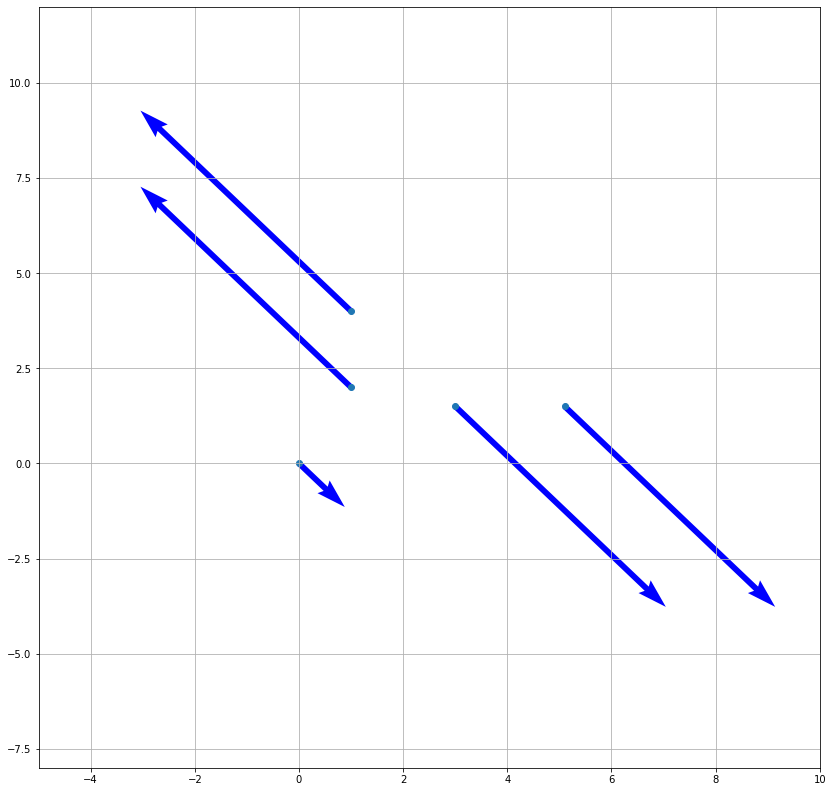

In [13]:
plot_force_vectors(atom_i, atom_j, atom_k, atom_l)

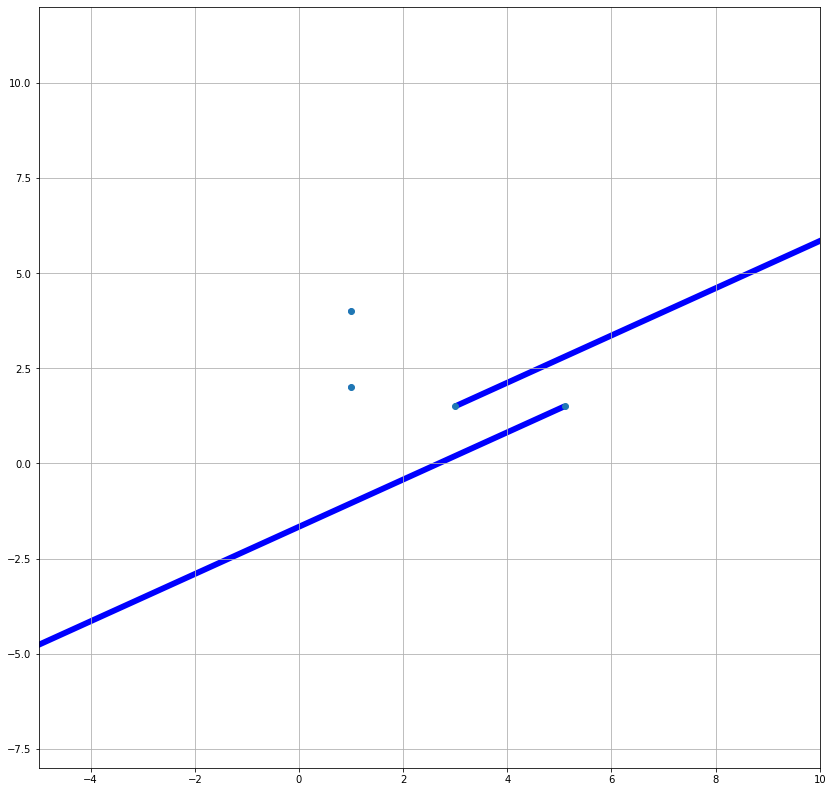

In [14]:
plot_force_vectors_a(atom_i, atom_j, atom_k, atom_l)

In [15]:
print(force_i_a(atom_i, atom_j, atom_k, atom_l))
print(force_j_a(atom_i, atom_j, atom_k, atom_l))
print(force_k_a(atom_i, atom_j, atom_k, atom_l))
print(force_l_a(atom_i, atom_j, atom_k, atom_l))

[4.56206897 2.06896552]
[-4.56206897 -2.06896552]
[91241.37931034 41379.31034483]
[-1.82482759e+09 -8.27586207e+08]
